In [1]:
!pip install --user ipykernel

In [2]:
!python -m ipykernel install --user --name=deep_learningwithpython

Installed kernelspec deep_learningwithpython in C:\Users\aligursu\AppData\Roaming\jupyter\kernels\deep_learningwithpython


In [3]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

In [35]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
import numpy as np

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
len(train_labels) 

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels) 

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [14]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 2ms/step - loss: 0.2577 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0496 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0376 - accuracy: 0.9888


In [15]:
test_digits = test_images[0:10]

In [16]:
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 56ms/step


In [17]:
predictions[0]

array([2.8558358e-09, 1.1245618e-10, 2.7602792e-07, 2.8624865e-05,
       3.9244359e-12, 6.5824532e-09, 1.7827119e-15, 9.9996877e-01,
       3.9384666e-08, 2.3315870e-06], dtype=float32)

In [18]:
predictions[0].argmax() 

7

In [19]:
predictions[0][7] 

0.99996877

In [20]:
test_labels[0] 

7

In [21]:
 test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9798


In [22]:
print(f"test_acc: {test_acc}")

test_acc: 0.9797999858856201


(28, 28)

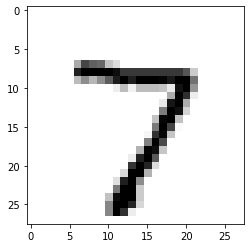

In [28]:
import matplotlib.pyplot as plt
digit = np.reshape(test_digits[0],(28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

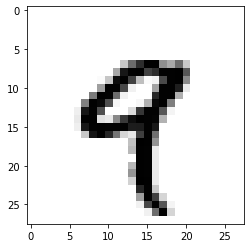

In [30]:
digit = np.reshape(train_images[4],(28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [31]:
 train_labels[4] 

9

In [32]:
my_slice = train_images[10:100]

In [33]:
my_slice.shape

(90, 784)

In general, you may select slices between any two indices along each tensor axis. For instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you would do this:

In [40]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[4, 14:, 14:]

In [41]:
my_slice.shape

(14, 14)

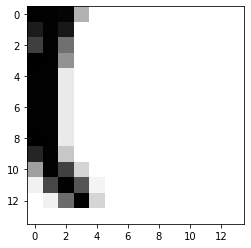

In [42]:
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

In [43]:
my_second_slice = train_images[4, 0:14, 0:14]

In [44]:
my_second_slice.shape

(14, 14)

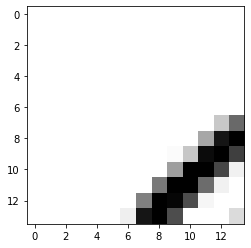

In [45]:
plt.imshow(my_second_slice, cmap=plt.cm.binary)
plt.show()

range(0, 2)


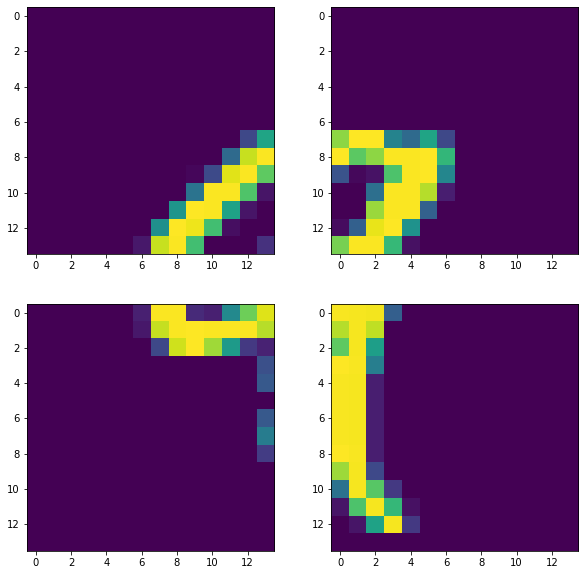

In [48]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
for r in range(2): 
    for c in range(2): 
        ax[r][c].imshow(train_images[4, (r*14):((r+1)*14), (c*14):((c+1)*14)])

It’s also possible to use negative indices. Much like negative indices in Python lists, they indicate a position relative to the end of the current axis. In order to crop the images to patches of 14 × 14 pixels centered in the middle, you’d do this:

In [49]:
my_slice = train_images[4, 7:-7, 7:-7]

In [51]:
my_slice.shape

(14, 14)

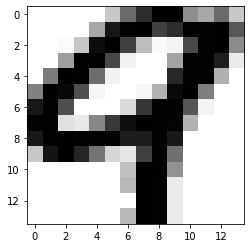

In [50]:
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning will be the samples axis (sometimes called the samples dimension)
deep learning models don’t process an entire dataset at once; rather, they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with a batch size of 128:

In [52]:
batch = train_images[:128]

In [53]:
batch.shape

(128, 28, 28)

In [17]:
X = np.random.random((32, 10))
y = np.random.random((10,))

In [18]:
print(X.shape)
print(y.shape)

(32, 10)
(10,)


In [20]:
Y = np.expand_dims(y, axis=0)
Y.shape

(1, 10)

In [21]:
Y = np.concatenate([Y] * 32, axis=0) 
#Repeat y 32 times along axis 0 to obtain Y, which has shape (32, 10).
Y.shape

(32, 10)

In [23]:
print(Y)
print("------------------------")
print(y)

[[0.94320421 0.21504832 0.89543577 0.5283796  0.99701757 0.24396838
  0.2575036  0.1940813  0.14789629 0.13592726]
 [0.94320421 0.21504832 0.89543577 0.5283796  0.99701757 0.24396838
  0.2575036  0.1940813  0.14789629 0.13592726]
 [0.94320421 0.21504832 0.89543577 0.5283796  0.99701757 0.24396838
  0.2575036  0.1940813  0.14789629 0.13592726]
 [0.94320421 0.21504832 0.89543577 0.5283796  0.99701757 0.24396838
  0.2575036  0.1940813  0.14789629 0.13592726]
 [0.94320421 0.21504832 0.89543577 0.5283796  0.99701757 0.24396838
  0.2575036  0.1940813  0.14789629 0.13592726]
 [0.94320421 0.21504832 0.89543577 0.5283796  0.99701757 0.24396838
  0.2575036  0.1940813  0.14789629 0.13592726]
 [0.94320421 0.21504832 0.89543577 0.5283796  0.99701757 0.24396838
  0.2575036  0.1940813  0.14789629 0.13592726]
 [0.94320421 0.21504832 0.89543577 0.5283796  0.99701757 0.24396838
  0.2575036  0.1940813  0.14789629 0.13592726]
 [0.94320421 0.21504832 0.89543577 0.5283796  0.99701757 0.24396838
  0.2575036 

In terms of implementation, no new rank-2 tensor is created, because that would be terribly inefficient. 
The repetition operation is entirely virtual: it happens at the algorithmic level rather than at the memory level. 
But thinking of the vector being repeated 10 times alongside a new axis is a helpful mental model.

The following example applies the element-wise maximum operation to two tensors of different shapes via broadcasting:

In [26]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
print(x.shape)
print(y.shape)

(64, 3, 32, 10)
(32, 10)


In [25]:
z.shape

(64, 3, 32, 10)

In [27]:
x = np.array([[0., 1.],
                  [2., 3.],
                  [4., 5.]])

In [28]:
x.shape

(3, 2)

In [29]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [30]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

A special case of reshaping that’s commonly encountered is transposition. 
Transposing a matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]:

In [36]:
x = np.zeros((300, 20))
x.shape

(300, 20)

In [37]:
x = np.transpose(x)
x.shape

(20, 300)

In [39]:
import tensorflow as tf

In [44]:
x = tf.Variable(3.)

In [47]:
with tf.GradientTape() as tape:
    y = x ** 2 + 3
grad_of_y_wrt_x = tape.gradient(y, x) 

In [48]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [49]:
x = tf.Variable(tf.random.uniform((2, 2))) 
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [50]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [51]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2)) 
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b 
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [52]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.0111184, 1.0111184],
        [1.0617037, 1.0617037]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [53]:
y = tf.matmul(x, W)
print(y)
y = tf.matmul(x, W) + b 
print(y)

tf.Tensor(
[[0.68445265 0.7953083 ]
 [0.28410396 0.35523275]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.68445265 0.7953083 ]
 [0.28410396 0.35523275]], shape=(2, 2), dtype=float32)


In [108]:
import tensorflow as tf
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
 
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
  
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
  
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)
  
    @property
    def weights(self):
        return [self.W, self.b]

In [159]:
import tensorflow as tf
class NaiveFullyConnected:
    def __init__(self,activation,input_size,output_size):
        #print(input_dim)
        self.activation = activation
        w_initial_value = tf.random.normal(shape=(input_size, output_size),mean=0, stddev=1e-1)
        w_initial_value = tf.abs(w_initial_value)
        self.W = tf.Variable(w_initial_value,dtype=np.float32)
        b_initial_value = tf.zeros(shape=(output_size,))
        self.b = tf.Variable(b_initial_value)
    def __call__(self,inputs):
        return(self.activation(tf.matmul(inputs,self.W) + self.b))
    @property
    def weights(self):
        return [self.W, self.b]
        

In [54]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
  
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x
  
    @property 
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [160]:
model = NaiveSequential([
    NaiveFullyConnected(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveFullyConnected(input_size=512, output_size=10, activation=tf.nn.softmax)
]) 
assert len(model.weights) == 4

In [73]:
import math
  
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
 
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [75]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [76]:
learning_rate = 1e-3 
  
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

assign_sub is the equivalent of -= for TensorFlow variables.

In [77]:
from tensorflow.keras import optimizers
  
optimizer = optimizers.SGD(learning_rate=1e-3)
  
def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [78]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [162]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255  
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255 
  
fit(model, train_images, train_labels, epochs=5, batch_size=128)

Epoch 0
loss at batch 0: 0.66
loss at batch 100: 1.10
loss at batch 200: 0.73
loss at batch 300: 0.54
loss at batch 400: 0.77
Epoch 1
loss at batch 0: 0.59
loss at batch 100: 0.56
loss at batch 200: 0.97
loss at batch 300: 0.50
loss at batch 400: 0.65
Epoch 2
loss at batch 0: 0.54
loss at batch 100: 0.57
loss at batch 200: 0.68
loss at batch 300: 0.47
loss at batch 400: 0.64
Epoch 3
loss at batch 0: 0.51
loss at batch 100: 0.62
loss at batch 200: 0.63
loss at batch 300: 0.46
loss at batch 400: 0.59
Epoch 4
loss at batch 0: 0.48
loss at batch 100: 0.49
loss at batch 200: 0.59
loss at batch 300: 0.44
loss at batch 400: 0.56


In [163]:
test_digits = test_images[0:10]

In [164]:
predictions = model(test_digits)

In [165]:
predictions = predictions.numpy()

In [166]:
predictions[0].argmax() 

7

In [167]:
predictions[0][7]

0.95656085

In [168]:
test_labels[0]

7

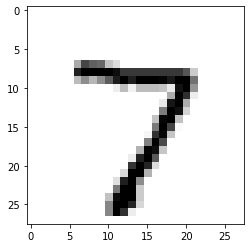

In [169]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(test_digits[0],(28,28)), cmap=plt.cm.binary)
plt.show()

In [105]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.31
